<a href="https://colab.research.google.com/github/prajakta421/firstrepository/blob/main/Hrsampleproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Pandas is most commenly used for Data wrangling and Data manipulation purpose.
# NumPy is a fundamental library for numerical computing in Python.Mathematical Operations, Arrays,Linear Algebra etc
# Removing Duplicates
# Fixing null values(Age, Department)
# Standardization of each value(Gender)
# Concatenate First Name and Last Name
# Add a new column(YearsAtcompany)
# Strength by Maritial Status

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
pd.set_option('display.max_rows',None)
df=pd.read_csv('Sample_HR.csv')

# df=df.shape[0]
# print('No of rows:',df)
# df=df[df.duplicated()].shape[0]
df=df.drop_duplicates()
Average_age=df['Age'].mean()
Average_age=int(Average_age)


df['Age']=df['Age'].fillna(Average_age)
df['Department']=df['Department'].fillna('Data Engineering')
df['Gender']=df['Gender'].replace({'M':'Male','F':'Female'})
df['Full Name']=df['First Name']+' '+df['Last Name']

columns=df.columns.tolist()
last_name_index=columns.index('Last Name')
last_name_index
columns.insert(last_name_index + 1, columns.pop(columns.index('Full Name')))
df = df[columns]

# Get the no of experience
hire_date=pd.to_datetime(df['Hire_Date']).dt.year
# hire_date
Current_year=datetime.now().year
df['YearsAtCompany']=Current_year-hire_date
df.head(1)


,Employee_ID,First Name,Last Name,Full Name,Gender,MaritalStatus,Department,Grade,Employee_Count,Job_Satisfaction,...,MonthlyRate,Age,Job Type,Job Experience,Hire_Date,Company_Environment,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,Country
0,1,Shelia,Mahoney,Shelia Mahoney,Male,Single,Sales,2,1,4,...,19479,41.0,Permannent,16,1/1/2010,5,0,1,15,United Kingdom


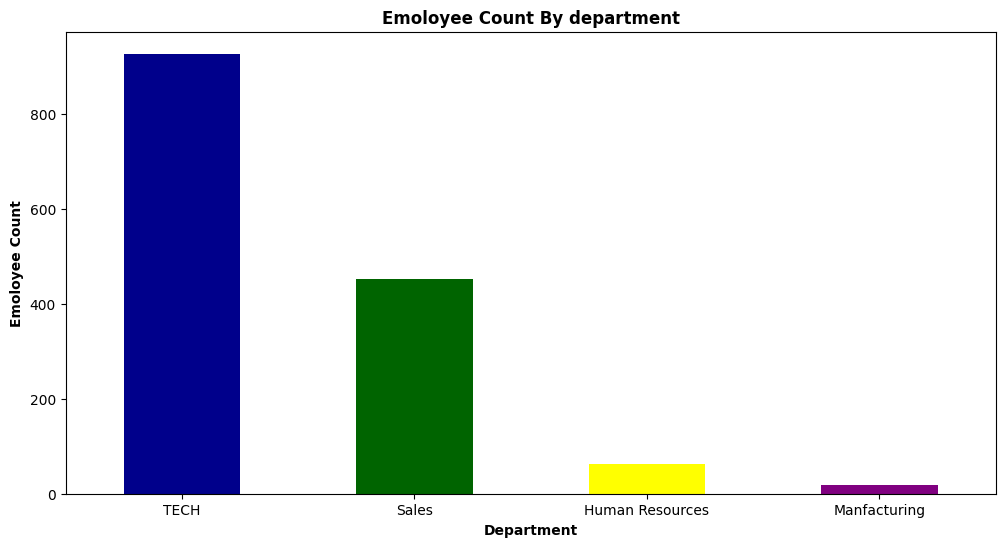

In [ ]:
# Create a Bar Chart
department_count=df['Department'].value_counts()
plt.figure(figsize=(12,6),facecolor='white')
color=['darkblue','darkgreen','yellow','purple']
department_count.plot(kind='bar',color=color)
plt.title('Emoloyee Count By department',fontweight='bold')
plt.xlabel('Department',fontweight='bold')
plt.ylabel('Emoloyee Count',fontweight='bold')
plt.xticks(rotation=0)
plt.show()

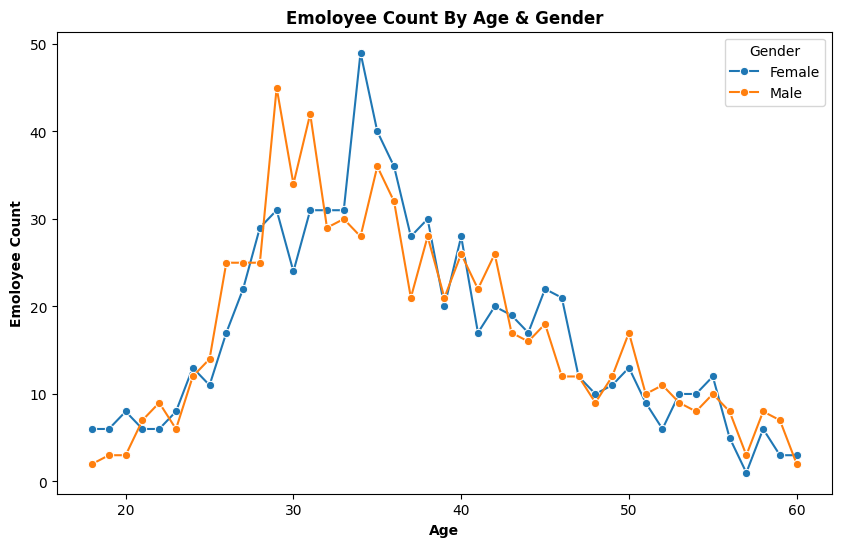

In [ ]:
age_gender=df.groupby(['Age','Gender']).size().reset_index(name='Count')
age_gender
plt.figure(figsize=(10,6))
sns.lineplot(data=age_gender, x='Age', y='Count', hue='Gender', marker='o')
plt.title('Emoloyee Count By Age & Gender',fontweight='bold')
plt.xlabel('Age',fontweight='bold')
plt.ylabel('Emoloyee Count',fontweight='bold')
plt.xticks(rotation=0)

plt.show()

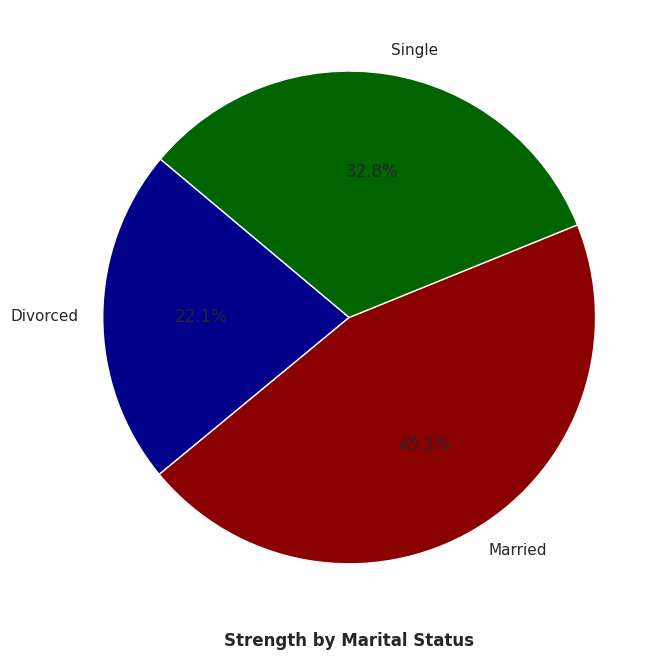

In [ ]:
Marital_Status_count=df.groupby(['MaritalStatus']).size().reset_index(name='Count')
Marital_Status=Marital_Status_count['MaritalStatus']
Count= Marital_Status_count['Count']

sns.set(style="whitegrid")
colors = sns.color_palette("colorblind")[0:len(Marital_Status)]
colors=['darkblue','darkred','darkgreen']
plt.figure(figsize=(8, 8))
plt.pie(Count, labels=Marital_Status, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.xlabel('Strength by Marital Status',fontweight='bold')
plt.show()


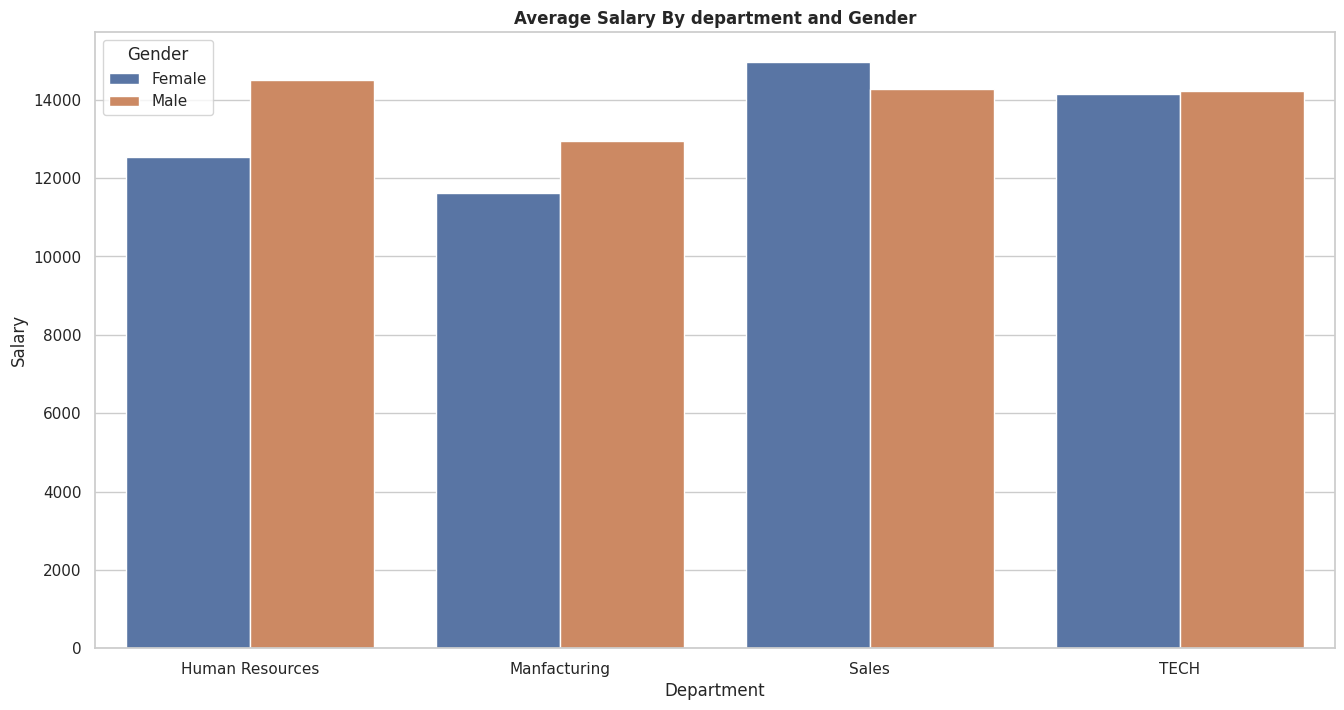

In [ ]:
df=df.rename(columns={'MonthlyRate':'Salary'})
average_Salary=df.groupby(['Department','Gender'])['Salary'].mean().reset_index()
plt.figure(figsize=(16, 8))
sns.barplot(data=average_Salary,x='Department', y='Salary', hue='Gender')
plt.title('Average Salary By department and Gender',fontweight='bold')
plt.show()

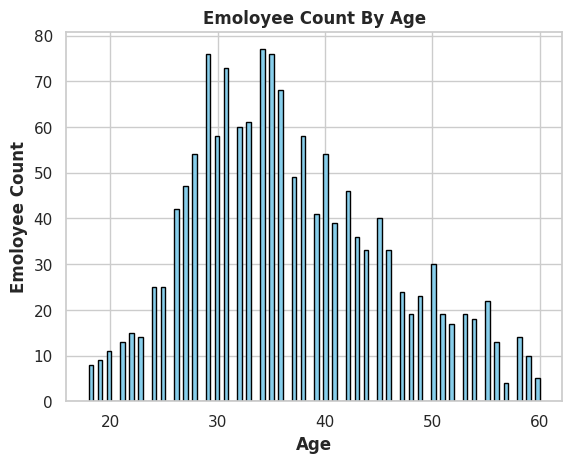

In [ ]:
age=df['Age']
plt.hist(age,bins=100,edgecolor='black',color='skyblue')
plt.title('Emoloyee Count By Age',fontweight='bold')
plt.xlabel('Age',fontweight='bold')
plt.ylabel('Emoloyee Count',fontweight='bold')
plt.show()



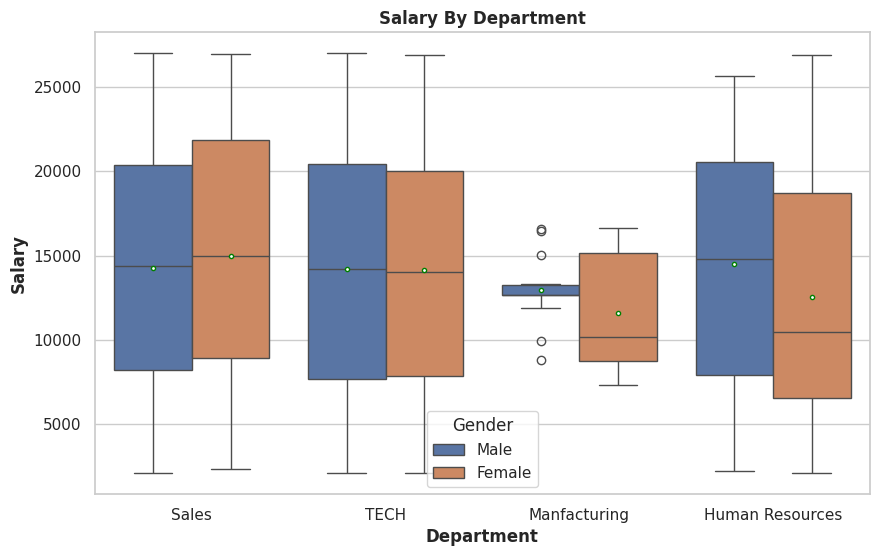

In [ ]:

plt.figure(figsize=(10, 6))
sns.boxplot(x='Department', y='Salary', data=df,hue='Gender',showmeans='True',meanprops={"marker":"o"
                                                                                  ,"markerfacecolor":"white"
                                                                                  ,"markersize":"3"
                                                                                  ,"markeredgecolor":"green"})
plt.title('Salary By Department',fontweight='bold')
plt.xlabel('Department',fontweight='bold')
plt.ylabel('Salary',fontweight='bold')
plt.show()